In [1]:
# 2023/06/28 
# python版とC++版の時間の比較，および計算された双極子の比較を行う．

In [1]:
# 計測時間のデータは以下（単位は秒）
python_1000=876
c_1000=46
c_5000=256
c_10000=501
c_20000=916
# ohtakaは128並列での計算
ohtaka_1000=18
ohtaka_20000=208
ohtaka_100000=993

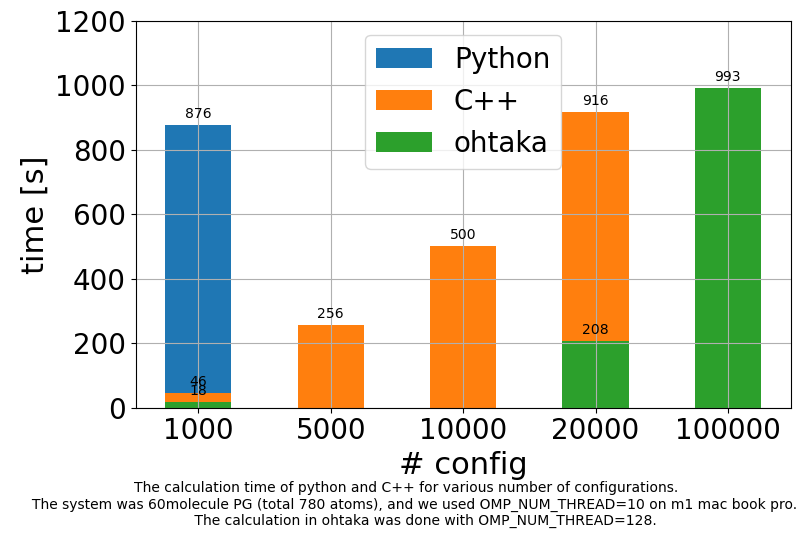

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

label= ["1000", "5000", "10000", "20000", "100000"]

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

graph=ax.bar([1], [876] , label="Python", lw=3, width=0.5, align="center")  # 描画
graph2=ax.bar([1,2,3,4,5], [46, 256, 500, 916,-10] , label="C++", lw=3, tick_label=label, width=0.5, align="center")  # 描画
graph3=ax.bar([1,4,5], [18, 208, 993] , label="ohtaka", lw=3, width=0.5, align="center")  # 描画

# 
for rect in graph2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

for rect in graph:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

for rect in graph3:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')

# 
ax.set_ylim(0,1200)

# 軸ラベル
xlabel="# config"
ylabel="time [s]"
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)
# 軸グリッド
ax.grid()
ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
# legendの設定
lgnd=ax.legend(loc="upper center",fontsize=20)
# ここ！！ テキストを追加
fig.text(0.5, -0.06, "The calculation time of python and C++ for various number of configurations.\n \
    The system was 60molecule PG (total 780 atoms), and we used OMP_NUM_THREAD=10 on m1 mac book pro. \n \
        The calculation in ohtaka was done with OMP_NUM_THREAD=128.", ha='center')
# 図表の保存
fig.savefig("calctime_ohtaka.png", bbox_inches='tight')
fig.savefig("calctime_ohtaka.pdf", bbox_inches='tight')


In [29]:
#
# * 計算した双極子の比較

pythondata=np.load("dipole_1000_CPml/result_dipole.npy")
cdata=np.loadtxt("total_dipole_1000.txt")

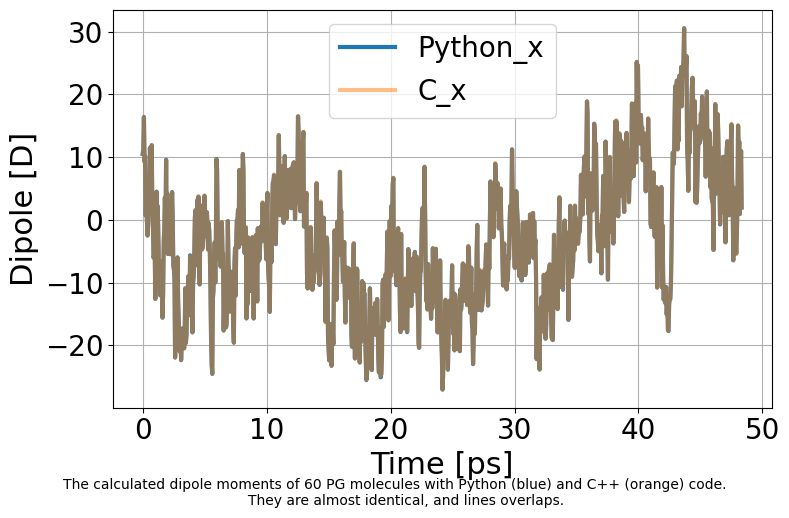

In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

dt=40*50
au2ps=0.02418884/1000

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True) # figure, axesオブジェクトを作成

ax.plot(dt*au2ps*np.arange(len(pythondata[:,0])), pythondata[:,0], label="Python_x", lw=3 )  # 描画
ax.plot(dt*au2ps*np.arange(len(cdata[:,0])), cdata[:,1], label="C_x", lw=3, alpha=0.5)  # 描画

# ax.plot(np.arange(len(pythondata[:,1])), pythondata[:,1], label="Python_y", lw=3 )  # 描画
# ax.plot(np.arange(len(cdata[:,0])), cdata[:,2], label="C_y", lw=3, alpha=0.5)  # 描画

# 
# ax.set_xlim(10,20)

# 軸ラベル
xlabel="Time [ps]"
ylabel="Dipole [D]"
ax.set_xlabel(xlabel,fontsize=22)
ax.set_ylabel(ylabel,fontsize=22)
# 軸グリッド
ax.grid()
ax.tick_params(axis='x', labelsize=20 )
ax.tick_params(axis='y', labelsize=20 )
# legendの設定
lgnd=ax.legend(loc="upper center",fontsize=20)
# ここ！！ テキストを追加
fig.text(0.5, -0.02, "The calculated dipole moments of 60 PG molecules with Python (blue) and C++ (orange) code.\n \
    They are almost identical, and lines overlaps.", ha='center')
# 図表の保存
fig.savefig("calcdipole.png", bbox_inches='tight')
fig.savefig("calcdipole.pdf", bbox_inches='tight')
